In [19]:
import pandas as pd
import seaborn as sns
import numpy as np

In [45]:
df = pd.read_csv("CORIS.txt")

# encode famhist with dummy 0-1 variable
df['famhist'] = pd.get_dummies(df['famhist'])['Present']
df['famhist'] = df['famhist'].astype(int)
target = 'chd'
features = ['sbp', 'tobacco', 'ldl', 'famhist', 'obesity', 'alcohol', 'age']
#features = ['famhist','ldl','age']

df.drop('row.names', axis=1, inplace=True)
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


In [46]:
X, y = df[features], df[target]

X = X.apply(pd.to_numeric, errors='coerce')

# Add a constant to the predictor variables matrix (for the intercept term)
X = sm.add_constant(X)

In [47]:
import statsmodels.api as sm
from scipy import stats


In [50]:
# Fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.522916
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    chd   No. Observations:                  462
Model:                          Logit   Df Residuals:                      454
Method:                           MLE   Df Model:                            7
Date:                Thu, 13 Jun 2024   Pseudo R-squ.:                  0.1895
Time:                        09:33:41   Log-Likelihood:                -241.59
converged:                       True   LL-Null:                       -298.05
Covariance Type:            nonrobust   LLR p-value:                 2.259e-21
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.1296      0.964     -4.283      0.000      -6.019      -2.240
sbp            0.0058      0.

C:\Users\dskcy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dskcy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dskcy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dskcy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

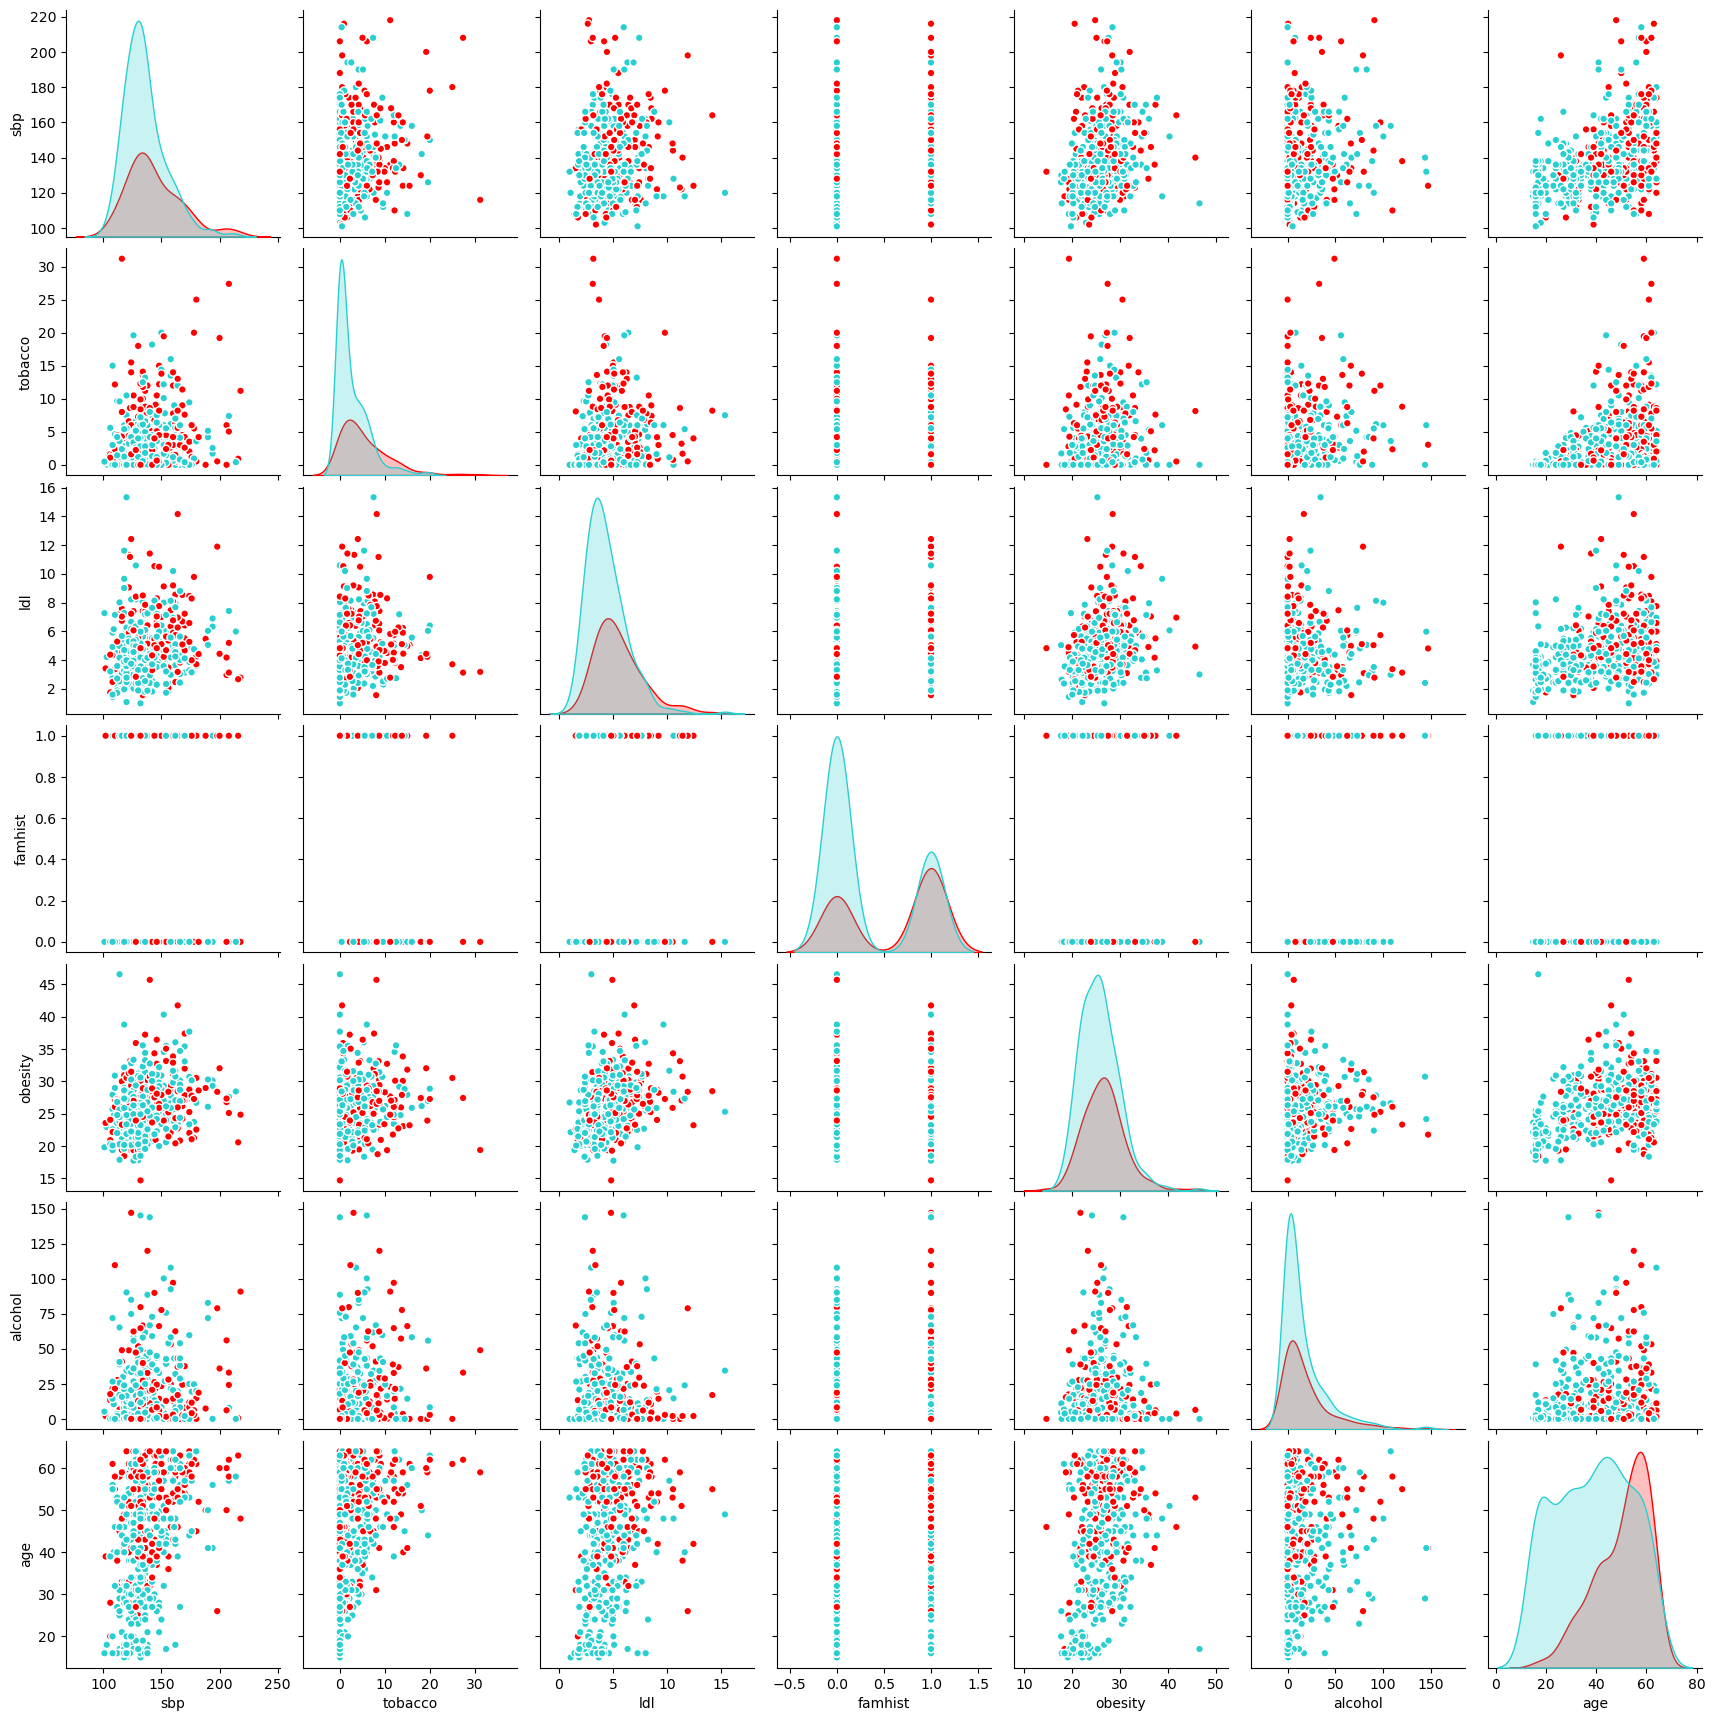

In [51]:
sns.pairplot(
    df, vars=features, kind="scatter", hue=target,
    palette=['#29CFD0', '#FF0000'], plot_kws=dict(s=30, linewidth=1)
)._legend.remove()


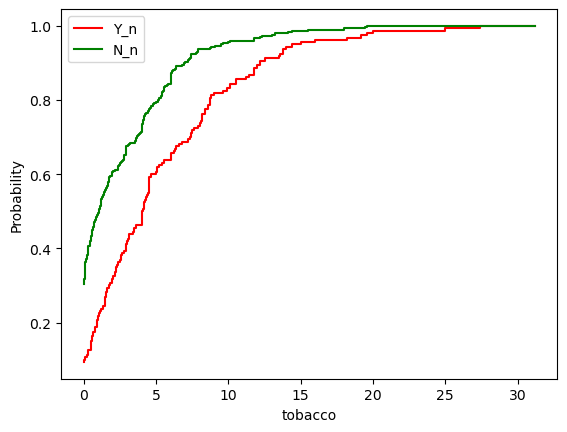

In [98]:
import math
import matplotlib.pyplot as plt
var = 'tobacco'
dis = df[df.chd==1][var]
nodis = df[df.chd==0][var]
alpha = 0.05
epsilon = math.sqrt((1 / (2 * n)) * math.log(2 / alpha))

# Empirical CDF
Y_n = lambda x : sum(dis <= x) / len(dis)
N_n = lambda x : sum(nodis <= x) / len(nodis)

xx = sorted(df[var])

data = pd.DataFrame({
    'x': xx, 
    'Y_n': np.array(map(Y_n, xx)), 
    'N_n': np.array(map(N_n, xx)), 
})

plt.step( 'x', 'Y_n', data=data, color='red')
plt.step( 'x', 'N_n', data=data, color='green')
plt.xlabel(var)
plt.ylabel('Probability')
plt.legend();

chd,0,1
famhist,,
0,76.296296,23.703704
1,50.000000,50.000000


In [80]:
count_table

chd,0,1
famhist,,
0,206,64
1,96,96


C:\Users\dskcy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


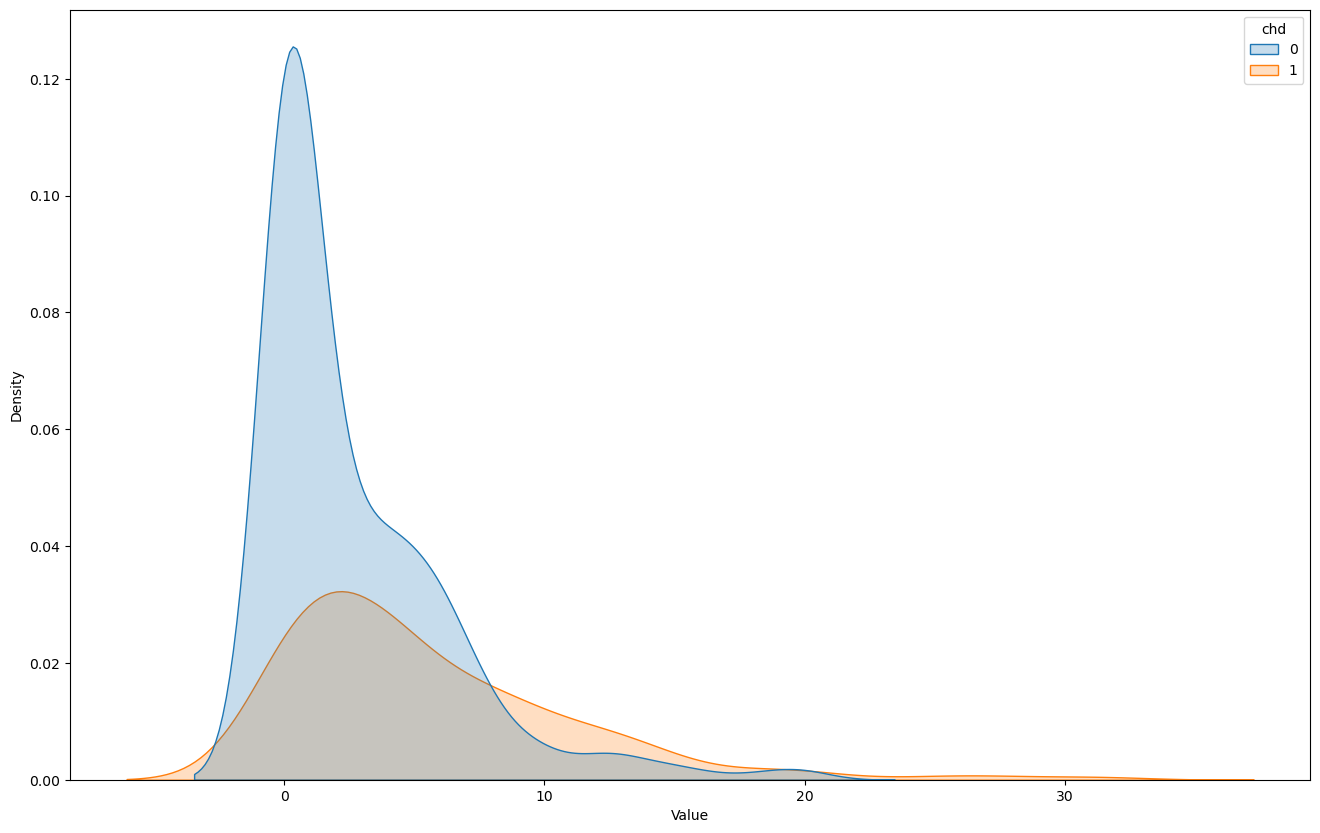

In [122]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 10))

# Plot histogram with hue
#sns.histplot(df, x='age', hue='chd', kde=True)
ax = sns.kdeplot(data=df, x='tobacco', hue='chd', fill=True)

# Add labels and title
plt.xlabel('Value')
#plt.ylabel('Count')
#plt.title('Histogram with Hue')

# Show plot
plt.show()


C:\Users\dskcy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dskcy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


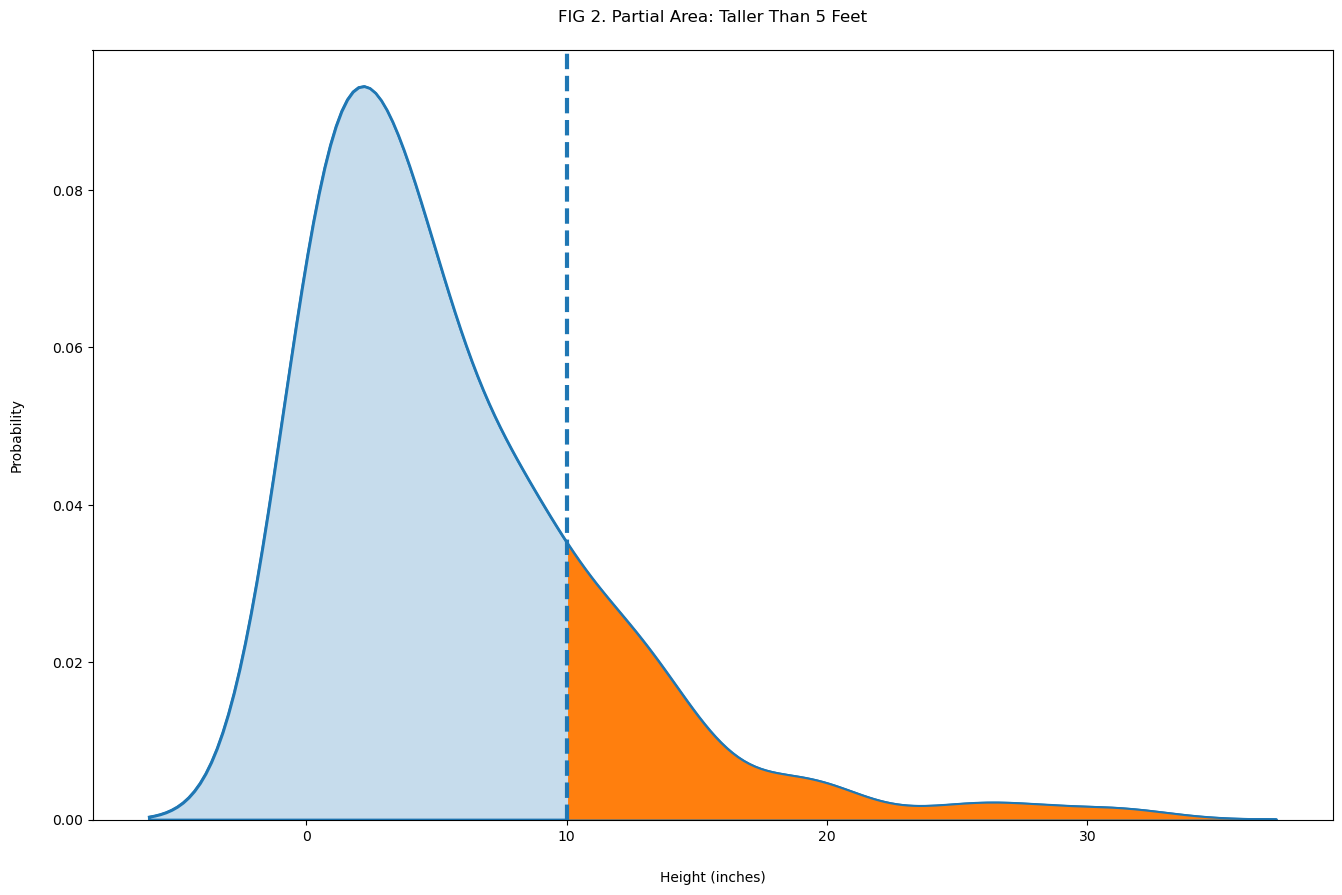

In [129]:
plt.figure(figsize=(16, 10))

heights = df[df.chd==1]['tobacco']
# Draw the density curve with it's area shaded
sns.kdeplot(heights, linewidth=2, fill=True)
# Invoke kdeplot() again to get reference to axes 
ax = sns.kdeplot(heights)
 
# Below code to shade partial region is from 
# https://stackoverflow.com/a/49100655
 
# Get all the lines used to draw the density curve 
kde_lines = ax.get_lines()[-1]
kde_x, kde_y = kde_lines.get_data()
 
# Use Numpy mask to filter the lines for region 
# reresenting height greater than 60 inches 
mask = kde_x > 10
filled_x, filled_y = kde_x[mask], kde_y[mask]
 
# Shade the partial region 
ax.fill_between(filled_x, y1=filled_y)
 
# vertical line at x = 60 for reference
plt.axvline(x=10, linewidth=3, linestyle='--')
 
plt.title("FIG 2. Partial Area: Taller Than 5 Feet", pad=20)
plt.xlabel("Height (inches)", labelpad=20)
plt.ylabel("Probability", labelpad=20)
plt.show()

In [128]:
import numpy as np 
 
# Area of the orange region (66 inches & above)
area = np.trapz(filled_y, filled_x)
 
print(f"Probability of heights higher than 60 inches: {area.round(4)}")


Probability of heights higher than 60 inches: 0.0481


In [116]:
for line in lines:
    x_kde, y_kde = line.get_data()
    if line.get_label() == 'No':
        # Find indices where x_kde is between 25 and 30
        indices = np.where((x_kde >= 25) & (x_kde <= 30))
        # Integrate y_kde between these indices
        area_no_25_to_30 = trapz(y_kde[indices], x_kde[indices])
    elif line.get_label() == 'Yes':
        # Find indices where x_kde is between 25 and 30
        indices = np.where((x_kde >= 25) & (x_kde <= 30))
        # Integrate y_kde between these indices
        area_yes_25_to_30 = trapz(y_kde[indices], x_kde[indices])


In [117]:
# Print areas under the KDE curves between 25 and 30
print(f'Area under KDE (No) between 25 and 30: {area_no_25_to_30:.2f}')
print(f'Area under KDE (Yes) between 25 and 30: {area_yes_25_to_30:.2f}')

Area under KDE (No) between 25 and 30: 0.00
Area under KDE (Yes) between 25 and 30: 0.00
